In [1]:
import numpy as np

In [2]:
### Fundamental parameters
e_charge = 1.6022e-19 # [C] electron charge
e_charge_cgs = 4.8e-10  # [statcoul] 
mass_proton = 1.6726e-24 # [g] proton mass 
mass_electron = 9.109e-28  # [g] electron mass
c_cgs         = 3.0e10     # [cm/s]
gamma = 5./3 # adiabatic index
K_Bol = 1.38e-16 # Boltsmann constant in CGS units

In [140]:
### Input parameters for the plasma system in CGS units
### except T_e, T_i are in [eV]

# weakly collisional shock
V = 0; # no streaming / drifting -> a very small value
B = 5.0e4; # [G], 30 T for shot 25 
T_e = 200.; 
T_i = 140.; 
# n_e = 4.0e18; 
n_e = np.logspace(17, 20, 1000);
space_scale = 0.1;

# A = 20.0;  # Neon 
# Z = 8.0 # indeed 

A = 1.0;  # Hydrogen
Z = 1.0 # indeed 

In [141]:
m_i = A * mass_proton   # [g]
n_i = n_e/Z             # [cm-3]
rho = n_i*m_i           # [g/cm3]

### Printing input parameters: ### 
print ('')
print ('Parameters:------------------')
print ('')
print ('Flow velocity V           = {:.1e}'.format(V),           '[cm/s]')
print ('B-field                   = {:.1e}'.format(B),           '[G]')
print ('Electron temperature T_e  = {:.1f}'.format(T_e),         '   [eV]')
print ('Ion temperature T_i       = {:.1f}'.format(T_i),         '   [eV]')
print ('Electron density n_e      = {:.1e}'.format(n_e),         '[cm-3]')
print ('Ion density n_i           = {:.1e}'.format(n_i),         '[cm-3]')   
print ('Density rho               = {:.1e}'.format(rho),         '[g/cm-3]')
print ('Charge state Z            = {:.1f}'.format(Z))
print ('Mass number A             = {:.1f}'.format(A))
print ('Spacial scale             = {:.1e}'.format(space_scale), '[cm]')

print ('')


Parameters:------------------

Flow velocity V           = 0.0e+00 [cm/s]
B-field                   = 5.0e+04 [G]
Electron temperature T_e  = 200.0    [eV]
Ion temperature T_i       = 140.0    [eV]


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [142]:
### Sound velocity and Alfven velocity
c_sound = np.sqrt(5.0*(n_i*T_i*K_Bol*1.16e4+n_e*T_e*K_Bol*1.16e4)/(3.0*rho)) # P_ther*gamma = rho*V_s^2 (1 eV = 1.16e4 K)
# print ('Sound velocity            = {:.1e}'.format(c_sound),  '[cm/s]')
c_alfven = B/(4*np.pi*n_i*m_i)**(1./2) # Formula from NRL p.29
# print ('Alfven velocity           = {:.1e}'.format(c_alfven), '[cm/s]')
c_magnetosonic = np.sqrt(c_sound**2 + c_alfven**2)
# print ('c_magnetosonic velocity   = {:.1e}'.format(c_magnetosonic), '[cm/s]')

print ('')

In [143]:
### ion inertial length
di = 2.28e7 * Z**(-1) * (A/n_i)**(0.5)  #[cm]
# print ('Ion inertial length di         = {:.1f}'.format(di*1e4),     '[um]')

### electron inertial length
de = 5.31e5 * (1/n_e)**(0.5)  #[cm]
# print ('Electron inertial length de    = {:.1f}'.format(de*1e4),     '[um]')
print(" ")

In [144]:
## collisions with near Maxwellian species and Ti ~ Te

# for eon-eon
cou_log_ee = 23.5 - np.log(n_e**0.5 * T_e**(-5./4.)) - (1e-5 + (np.log(T_e)-2.)**2/16.)**0.5
# print('cou_log_ee = {:.1f}'.format(cou_log_ee))
v_ee = 2.9e-6 * n_e * cou_log_ee * T_e**(-3./2.) # s^-1
tau_ee = 1. / v_ee * 1e9 # ns
# print('v_ee       = {:.1e} s^-1'.format(v_ee))
# print('tau_ee     = {:.1e} ns'.format(tau_ee))

In [145]:
cou_log_ii = 23. - np.log(np.sqrt(2.) * Z**3 * n_i**0.5 * T_i**(-1.5))
# print('Coul. Log. of ion-ion = {:.1f}'.format(cou_log_ii))
v_ii = 4.8e-8 * n_i * cou_log_ii * T_i**(-3./2.) * A**(-0.5) * Z**4 # s^-1
tau_ii = 1./v_ii*1e9 # ns
# print('v_ii       = {:.1e} s^-1'.format(v_ii))
# print('tau_ii     = {:.1e} ns'.format(tau_ii))

In [85]:
# for ion-eon
print('T_i = {:.1f}'.format(T_i))
print('T_e = {:.1f}'.format(T_e))
print('T_i * mass_electron / m_i = {:.1e}'.format(T_i * mass_electron / m_i))
print('10. * Z**2 = {:.1f}'.format(10. * Z**2))

if T_i * mass_electron / m_i < T_e < 10. * Z**2:
    print('case 1:')
    cou_log_ie = 23. - np.log(n_e**0.5 * Z * T_e**(-1.5))
elif T_i * mass_electron / m_i < 10. * Z**2 < T_e:
    print('case 2:')
    cou_log_ie = 24. - np.log(n_e**0.5 * T_e**(-1))
elif T_e < T_i * mass_electron / m_i:
    print('case 3:')
    cou_log_ie = 16. - np.log(n_i**0.5 * T_i**(-1.5) * Z**2 * A)
# print('cou_log_ie = {:.1f}'.format(cou_log_ie))
print(' ')

#thermal electron velocity
vth_e= 4.19e7*(T_e)**(1./2) # [cm/sec] Formula from NRL p.29
v_rel = vth_e
x_ie = mass_electron * v_rel**2 / (2*T_e*K_Bol*1.16e4)
print('for ion-eon, x_ie = {:.2e}'.format(x_ie))
x_ei = m_i * v_rel**2 / (2*T_i*K_Bol*1.16e4)
print('for eon-ion, x_ei = {:.2e}'.format(x_ei))

if x_ie < 1:
    print('case a:')
    f_ie = 1.6e-9 * A**(-1) * T_e**(-1.5) * n_e * Z**2 * cou_log_ie
else:
    print('case b:')
    f_ie = 1.7e-4 * A**0.5 * ekin_i**(-1.5) * n_e * Z**2 * cou_log_ie

tau_ie = 1./f_ie*1e9 # ns
# print('collision frequency f_ie   = {:.2e} s^-1'.format(f_ie))
# print('collision time      tau_ie = {:.1f} ns'.format(1./f_ie*1e9))

cou_log_ei = cou_log_ie
# print('cou_log_ei = {:.1f}'.format(cou_log_ei))
print(' ')
if x_ei < 1:
    print('case A:')
    f_ei = 0.23 * A**1.5 / T_i**1.5 * n_i * Z**2 * cou_log_ei
else:
    print('case B:')
    ekin_e = 0.5*(mass_electron*1e-3)*(vth_e*1e-2)**2 / e_charge # [eV]
    print('ekin_e = {:.1f} eV'.format(ekin_e))
    f_ei = 3.9e-6 / ekin_e**1.5 * n_i * Z**2 * cou_log_ei

tau_ei = 1./f_ei*1e9 # ns
# print('collision frequency f_ei   = {:.2e} s^-1'.format(f_ei))
# print('collision time      tau_ei = {:.1e} ns'.format(1./f_ei*1e9))




T_i = 140.0
T_e = 200.0
T_i * mass_electron / m_i = 3.8e-03
10. * Z**2 = 640.0
case 1:
 
for ion-eon, x_ie = 4.99e-01
for eon-ion, x_ei = 2.62e+04
case a:
 
case B:
ekin_e = 99.8 eV


In [10]:
import matplotlib.pyplot as plt

In [31]:
tau_ii_Neon = tau_ii

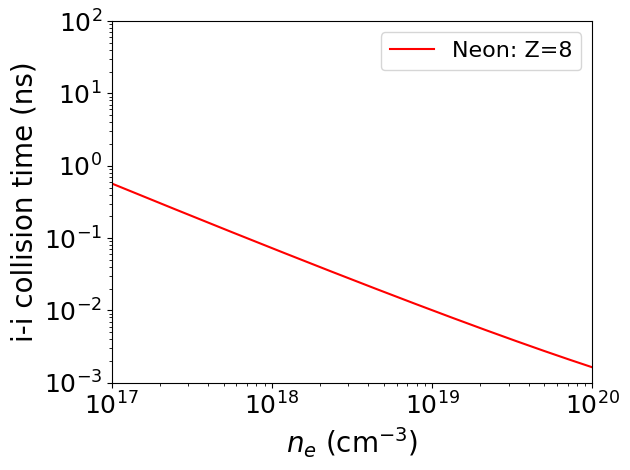

In [32]:
plt.loglog(n_e, tau_ii_Neon, '-', color='red', label='Neon: Z=8')
# plt.loglog(n_e, tau_ii_Hydrogen, '--', color='blue', label='Hydrogen: Z=1')


plt.xlabel(r'$n_e$ (cm$^{-3}$)',fontsize=20)
plt.ylabel('i-i collision time (ns)',fontsize=20)
# plt.title('Ion species: Nitrogen N')
plt.xlim(1e17,1e20)
plt.ylim(1e-3,100)
# plt.grid(which='both',alpha=0.5,ls='--')
plt.legend(fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
# plt.show()
# plt.savefig('/Users/yao/Desktop/i_i_coll.png',dpi=600)

In [122]:
plt.savefig('/Users/yao/Desktop/i_i_coll.pdf',dpi=600)

<Figure size 640x480 with 0 Axes>

In [96]:
tau_ii_Hydrogen = tau_ii

In [146]:
omega_tau_i = e_charge_cgs*Z*B*tau_ii/1e9/m_i/c_cgs

In [147]:
omega_tau_e = e_charge_cgs*B*tau_ee/1e9/mass_electron/c_cgs

In [148]:
## save the data


# omega_tau_i_Neon_5T = omega_tau_i
# omega_tau_e_Neon_5T = omega_tau_e

# omega_tau_i_Neon_10T = omega_tau_i
# omega_tau_e_Neon_10T = omega_tau_e

# omega_tau_i_Neon_20T = omega_tau_i
# omega_tau_e_Neon_20T = omega_tau_e

# omega_tau_i_Neon_30T = omega_tau_i
# omega_tau_e_Neon_30T = omega_tau_e

# omega_tau_i_H_30T = omega_tau_i
# omega_tau_e_H_30T = omega_tau_e

# omega_tau_i_H_20T = omega_tau_i
# omega_tau_e_H_20T = omega_tau_e

# omega_tau_i_H_10T = omega_tau_i
# omega_tau_e_H_10T = omega_tau_e

omega_tau_i_H_5T = omega_tau_i
omega_tau_e_H_5T = omega_tau_e

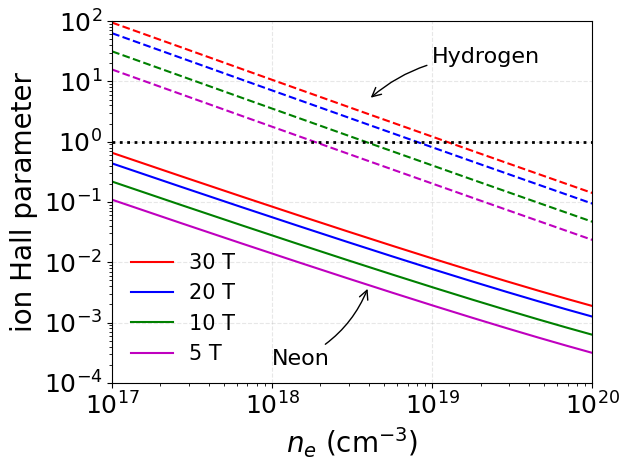

In [189]:
plt.loglog(n_e, omega_tau_i_Neon_30T, '-', color='red', label='30 T')
# plt.loglog(n_e, omega_tau_e_Neon_30T, '--', color='red', label='Neon: e-, 30 T')
plt.loglog(n_e, omega_tau_i_H_30T, '--', color='red')#, label='H 30 T')

plt.loglog(n_e, omega_tau_i_Neon_20T, '-', color='blue', label='20 T')
# plt.loglog(n_e, omega_tau_e_Neon_20T, '--', color='blue', label='Neon: e-, 20 T')
plt.loglog(n_e, omega_tau_i_H_20T, '--', color='blue')#, label='H 20 T')


plt.loglog(n_e, omega_tau_i_Neon_10T, '-', color='green', label='10 T')
# plt.loglog(n_e, omega_tau_e_Neon_10T, '--', color='green', label='Neon: e-, 10 T')
plt.loglog(n_e, omega_tau_i_H_10T, '--', color='green')#, label='H 10 T')

plt.loglog(n_e, omega_tau_i_Neon_5T, '-', color='m', label='5 T')
# plt.loglog(n_e, omega_tau_e_Neon_5T, '--', color='m', label='Neon: e-, 5 T')
plt.loglog(n_e, omega_tau_i_H_5T, '--', color='m')#, label='H 5 T')

# plt.loglog(n_e, tau_ii_Hydrogen, '--', color='blue', label='Hydrogen: Z=1')

plt.hlines(1.0,1e17, 1e20, colors='k', ls=':', lw=2.0)

plt.annotate('Hydrogen', xy=(4e18, 5), xytext=(1e19, 20), fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))

plt.annotate('Neon', xy=(4e18, 4e-3), xytext=(1e18, 2e-4), fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.2"))


plt.xlabel(r'$n_e$ (cm$^{-3}$)',fontsize=20)
plt.ylabel('ion Hall parameter',fontsize=20)
# plt.title('Ion species: Nitrogen N')
plt.xlim(1e17,1e20)
plt.ylim(1e-4,1e2)
plt.grid(which='major',alpha=0.3,ls='--')
plt.legend(fontsize=15, frameon=False, fancybox=False)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
# plt.show()
plt.savefig('/Users/yao/Desktop/i_i_mag.pdf',dpi=600)

In [ ]:
omega_tau_i

In [16]:
e_charge_cgs*Z*B/m_i/c_cgs

1147913428.1956236

In [3]:
ni = 1.e3 / (1.38e-23 * 300.) # m^-3

In [5]:
me  = 9.1e-31
mp  = 1836*me
mi  = 14*mp # kg
rho = mi*ni # kg/m3

In [6]:
rho

0.00564991304347826

In [7]:
rho*1e3/1e6

5.649913043478261e-06